## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df = pd.read_csv(r'C:\mazen\Downloads\archive\netflix_titles.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Data Cleaning

In [4]:
df.drop(['show_id', 'director', 'description', 'release_year'], axis=1, inplace=True)

In [5]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [6]:
# choosing only the year from the date to use it later
df['date_added'] = pd.DatetimeIndex(df['date_added']).year

In [7]:
df.head()

,type,title,cast,country,date_added,rating,duration,listed_in
0,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016.0,TV-MA,93 min,"Dramas, International Movies"
2,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018.0,R,78 min,"Horror Movies, International Movies"
3,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017.0,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020.0,PG-13,123 min,Dramas


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

type            0
title           0
cast          718
country       507
date_added     10
rating          7
duration        0
listed_in       0
dtype: int64

In [10]:
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

type          0
title         0
cast          0
country       0
date_added    0
rating        0
duration      0
listed_in     0
dtype: int64

## Visualizations

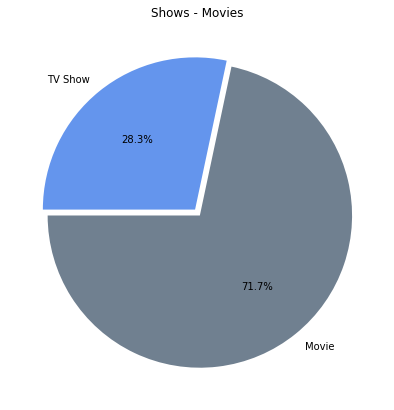

In [12]:
plt.figure(figsize=(18,7))
plt.title("Shows - Movies")
plt.pie(df.type.value_counts(),explode=(0.025,0.025), labels=df.type.value_counts().index, colors=['slategrey', 'cornflowerblue'],autopct='%1.1f%%', startangle=180)

plt.show()

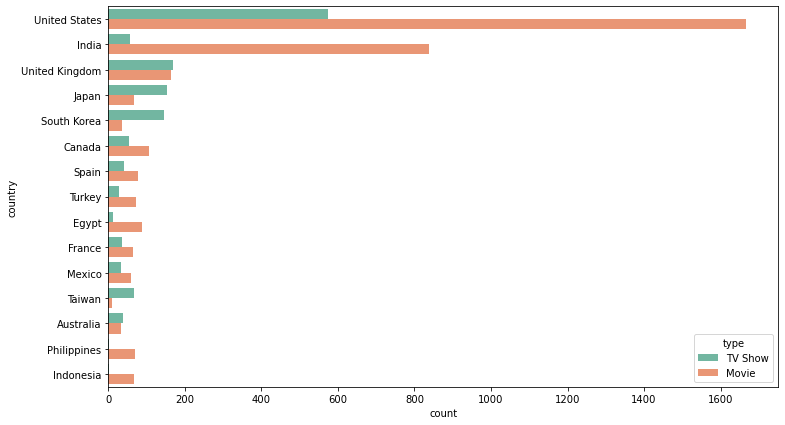

In [13]:
# Finding The most productive country
sns.set_palette("Set2")
fig = plt.subplots(figsize=(12,7))
sns.countplot(y='country', hue='type', order=df.country.value_counts().index[:15], data=df)
plt.show()

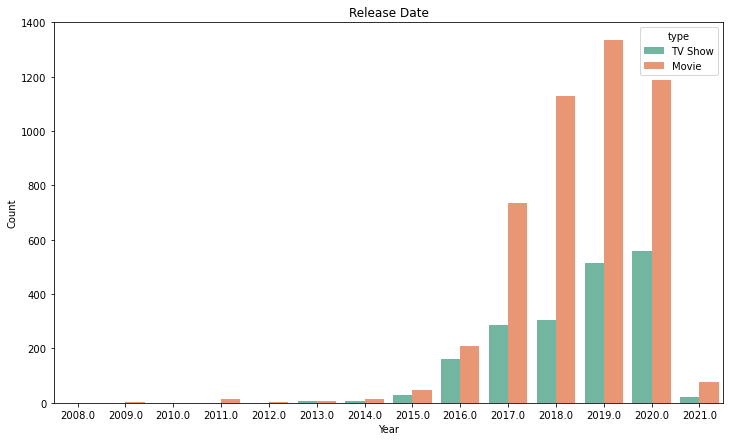

In [14]:
# Visualization of the release date
sns.set_palette("Set2")
fig = plt.subplots(figsize=(12,7))
sns.countplot(x='date_added', hue='type', data=df)
plt.title('Release Date')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

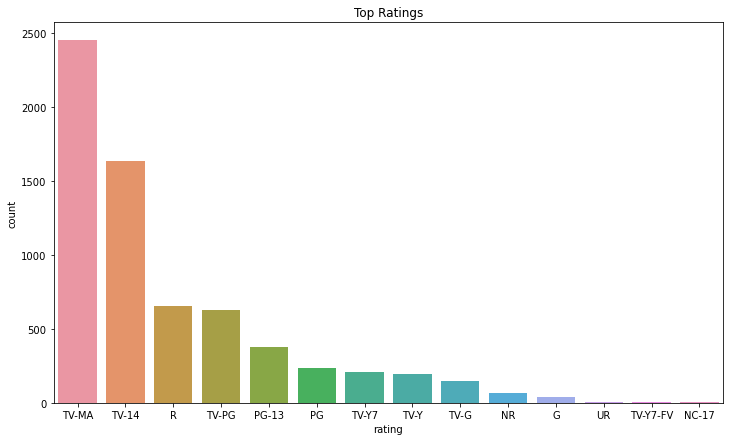

In [15]:
sns.set_palette("RdBu")
fig = plt.subplots(figsize=(12,7))
sns.countplot(x='rating', order = df['rating'].value_counts().index[:15], data=df)
plt.title('Top Ratings')
plt.show()

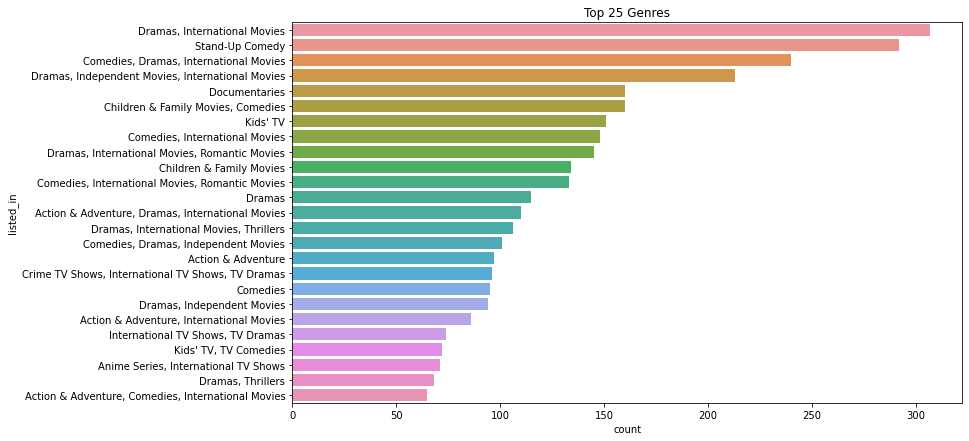

In [16]:
fig = plt.subplots(figsize=(12,7))
sns.countplot(y='listed_in', order = df['listed_in'].value_counts().index[:25], data=df)
plt.title('Top 25 Genres')
plt.show()

In [17]:
netflix_movies = df[df['type'] == 'Movie']
netflix_shows = df[df['type'] == 'TV Show']

In [18]:
netflix_movies.duration = netflix_movies.duration.str.replace(' min','').astype(int)
netflix_shows.replace({'duration':{'1 Season':'1 Seasons'}}, inplace=True)
netflix_shows.duration = netflix_shows.duration.str.replace(' Seasons','').astype(int)

C:\Users\Data Scientist\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\Data Scientist\anaconda3\lib\site-packages\pandas\core\generic.py:6662: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[c] = res[c].replace(


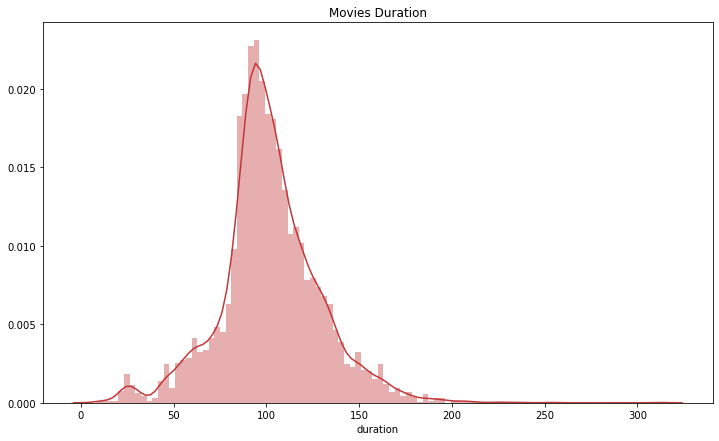

In [19]:
fig = plt.subplots(figsize=(12,7))
sns.distplot(netflix_movies['duration'], bins=100)
plt.title('Movies Duration');

Text(0.5, 0, 'Season(s)')

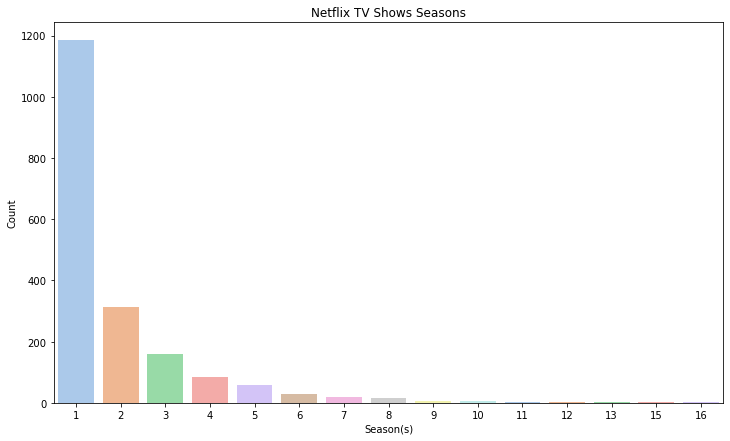

In [21]:
ax = plt.subplots(figsize=(12, 7))
g2 = sns.countplot(netflix_shows.duration,ax=ax[1],palette="pastel");
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")